In [87]:
import os

# Ignore numpy warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
#%matplotlib notebook

# Use seaborn settings.
import seaborn as sns
sns.set(
        #context="paper",
        context="talk",
        #context="poster",
        style='darkgrid',
        #style="dark",
        #palette='deep',
        font='sans-serif', 
        #font_scale=1.0, 
        #color_codes=False, 
        rc={'figure.figsize': (12, 7)}, # width and height in inches.
)

import IPython

def _embed(src, width="800", height="400"):
    return IPython.display.IFrame(src=src, width=str(width), height=str(height))

from IPython.core.magic import (register_line_magic, register_cell_magic,
                                register_line_cell_magic)

@register_line_magic
def embed(line):
    "my line magic"
    #return line
    return _embed(line)


# We delete these to avoid name conflicts for automagic to work
del embed
#del lcmagic

# Theme
# import jtplot module in notebook
#from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
#jtplot.style(theme='monokai')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
#jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
#jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# reset default matplotlib rcParams
#jtplot.reset()

from abipy import abilab
import abipy.data as abidata

si_pseudo = os.path.join(abidata.pseudo_dir, "14si.pspnc")

# AbiPy

### M. Giantomassi and the AbiPy group

<!--
<img src="./figures/dataset-diagram-logo.png" width="35%" align="center">
**ACINN workshop**, Tue 07.02.2017

Slides: <a href="http://fabienmaussion.info/acinn_xarray_workshop">http://fabienmaussion.info/acinn_xarray_workshop</a>

Notebook: <a href="https://github.com/fmaussion/teaching/blob/master/xarray_intro_acinn/ACINN_workshop_xarray-slides.ipynb"> On GitHub</a>


<div class="container">
  <div class="jumbotron">
    <h1>Bootstrap Tutorial</h1> 
    <p>Bootstrap is the most popular HTML, CSS, and JS framework for developing
    responsive, mobile-first projects on the web.</p> 
  </div>
  <p>This is some text.</p> 
  <p>This is another text.</p> 
</div>
-->

<!-- link rel="stylesheet" href="reveal.js/css/theme/sky.css" id="theme" -->

These slides have been generated automatically using *jupyter*, *nbconvert* and *revealjs*. 
Most of the examples can be executed using.


<div class="alert alert-info">
  <strong>Info!</strong> Indicates a neutral informative change or action.
</div>


<img src="./assets/abipy_logo.jpg" width="55%" align="center">
<!-- img src="./assets/abinit_logo.jpg" width="45%" align="right"-->

## What is AbiPy?

#### Python package for:

   * Generating ABINIT input files automatically
   * Post-processing output results (*netcdf* and *text* files)
   * Interfacing ABINIT with external tools (e.g. [Vesta](http://jp-minerals.org/vesta/en/))
   * Creating and executing workflows (relaxations, phonons, $GW$…)
   
#### Project:

* Developed and maintained by the ABINIT community
* Used by developers to validate, profile and optimize ABINIT
* Hosted on [github](https://github.com/abinit/abipy) 
* Release under the GPLv2 license

## Why python?

   * Easy to use and to learn
   * Great support for science ([numpy](http://www.numpy.org/), [scipy](https://www.scipy.org/), [pandas](http://pandas.pydata.org/), [matplotlib](https://matplotlib.org/) …)
   * Interactive environments ([ipython](http://ipython.org/), [jupyter notebooks](https://jupyter.org/), GUIs)
   * More powerful and flexible than Fortran for implementing the high-level logic needed in modern ab-initio workflows
   * [pymatgen](https://github.com/materialsproject) ecosystem and the [materials project database](https://www.materialsproject.org/)…
   
<img src="./assets/pydata_stack.png" width="65%" align="center">

## AbiPy design principles

* Extend the pymatgen code-base with ABINIT-specific objects
* Layered structure designed for different use-cases:
        
     * Post-processing API
     * Comand line interface
     * API to automate calculations and data analysis
     * High-throughput infrastructure ([abiflows](https://github.com/abinit/abiflows), [fireworks](https://github.com/materialsproject/fireworks), [mongodb](https://www.mongodb.com/))
     
* Closely connected to ABINIT executable:

    * CPU-critical operations performed by ABINIT (Fortran + MPI + OpenMP)
    * Glue code implemented in python
   
* ABINIT and AbiPy communicate through [netcdf](https://www.unidata.ucar.edu/software/netcdf/docs/) files

    * Portable binary format implemented in C
    * Fortran/Python bindings and support for parallel MPI-IO (HDF5)
    * Use [ETSF-IO specs](https://www.etsf.eu/fileformats) to describe crystalline structures, wavefunctions, densities, potentials ...

## How to install AbiPy

<!-- From the most simple to the most complex one, you have three options:-->

Using [conda](https://conda.io/en/latest/) (*recommended*):

        conda install abipy --channel abinit 

Using [pip](https://pypi.org/project/pip/) and python wheels:

        pip install abipy

From the [github repository](https://github.com/abinit/abipy) (*develop mode*):

        git clone https://github.com/abinit/abipy.git
        cd abipy 
        python setup.py develop
    
<!--
https://pypi.org/project/abipy/
https://anaconda.org/abinit/abipy
-->

<hr>

For further info see http://abinit.github.io/abipy/installation.html

## Why conda?


* Powerful package and environment management system for <u>any programming language</u>.
  Quite popular in the python community 
      
* Precompiled libraries ➝ no compilation of C/Fortran/C++ code:

        conda install netcdf 
        
* Less headaches when trying to install packages with many dependencies 

* <u>Isolated</u> and <u>reproducible</u> environments can be created easily
 
* Great tool for developers:
    
            conda create -n env3.7 python=3.7

* Most conda packages are friendly across Linux/MacOsX/Windows
  
* Tons of packages available on the [conda-forge](https://conda-forge.org/) channel
  
<hr>

### If you’re still not convinced about using conda...

## How to install Abinit on your laptop with conda

#### Download and install *miniconda* on your Linux machine with:

        wget https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
        bash Miniconda3-latest-Linux-x86_64.sh

<!--
while for **MacOSx** use:

    curl -o https://repo.continuum.io/miniconda/Miniconda3-latest-MacOSX-x86_64.sh
    bash Miniconda3-latest-MacOSX-x86_64.sh


Answer ``yes`` to the question:


    Do you wish the installer to prepend the Miniconda3 install location
    to PATH in your /home/gmatteo/.bashrc ? [yes|no]
    [no] >>> yes
-->

#### Source your *.bashrc* file to activate the changes:

        source ~/.bashrc
    
#### Add *conda-forge* to your conda channels:

        conda config --add channels conda-forge

#### Install the parallel version of abinit from the [abinit channel](https://anaconda.org/abinit/abinit) with:

    conda install abinit --channel abinit

<hr>

Futher info at https://github.com/abinit/abiconda

## AbiPy documentation

<!--
* http://abinit.github.io/abipy/index.html

* Jupyter notebooks 
* Gallery of matplotlib examples and flows
* abitutorial github repo with additional examples


<img src="./assets/abipy_doc_homepage.png" width="100%" align="center">
-->

In [88]:
%embed https://abinit.github.io/abipy/index.html

##  Jupyter notebooks with [examples and lessons](https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/index.ipynb) 

<!-- img src="./assets/abipy_notebooks.png" width="100%" align="center" -->

In [89]:
%embed https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/index.ipynb

## What do we need to automate calculations?

* Tools to parse and analyze output results
* API to generate input files
* High-level logic for:

    * Managing complicated workflows
    * Exposing task parallelism (independent steps can be executed in parallel)
    * Handling runtime errors, restarting calculations
    * Saving final results in machine-readable format (e.g. database)

<img src="./assets/petretto_results.png" width="75%" align="center">

<hr>

### Let's discuss the different parts step by step…

<img src="./assets/Data-Analysis.jpg" width="95%" align="center">

## AbiPy Post-processing tools

* Main entry point: 

  ```python
       from abipy import abilab
  abifile = abilab.abiopen("filename")
  ```
        
  where *filename* is usually a *netcdf* file, text files are also supported (*.abo*, *DDB*)

* *abifile* is the *AbiFile* subclass associated to the given file extension:

    1. GSR.nc ➝ *GsrFile*
    2. HIST.nc ➝ *HistFile*
    3. More than 45 file extensions supported (see `abiopen.py --help`) 
    
* AbiPy objects provide *plot* methods returning 
  [*matplotlib*](https://matplotlib.org/) figures
* Inside the shell, one can use `abiopen.py FILE` to:

     * open the file inside the [*ipython*](https://ipython.org/) terminal
     * produce a predefined set of *matplotlib*  figures (`--expose` option)
     * generate [jupyter notebook](https://jupyter.org/) (`--notebook` option)
    
    
<!--
### Conventions

    * `abifile.structure` represent the crystalline structure (subclass of pymatgen Structure)
    * `abifile.ebands` represent electron band energies 
    * `abifile.phbands` stores phonon frequencies and modes 
-->

#### Before we start, we need to import some basic python modules:

In [90]:
from abipy import abilab
import abipy.data as abidata

#### Now we can open our netcdf file with *abiopen*

In [91]:
gsr_kpath = abilab.abiopen("si_nscf_GSR.nc")

The GSR file contains information about the crystalline structure, forces, stresses as well as the KS band structure. 

In the jargon of object-oriented programming, one says that a GSRFile has a Structure object:

This means that if you learn how to use the methods provided by structure and ebands, then you can easily get these objects from the GSR file and use this API to post-process the results. This is a general philosophy of AbiPy: every netcdf file object returned by abiopen contains other objects (the structure is always available, while the presence of other objects depend of the particular file).

The GSR file (mnemonics: Ground-State Results) is a netcdf file with the results produced by SCF or NSCF ground-state calculations (band energies, forces, energies, stress tensor). 
To open a GSR file, use the abiopen function defined in abilab:

#### that returns an *AbiFile* object provinding access to several physical properties:

   * *abifile.structure* ➝ crystalline structure (subclass of pymatgen *Structure*)
   * *abifile.ebands* ➝ object electron band energies
   * *abifile.ebands.kpoints* ➝ list of k-points in band energies 
   * *abifile.phbands* ➝ object with phonon frequencies and displacements

##### The *GsrFile* has a pymatgen *structure*:

In [92]:
print(gsr_kpath.structure)

Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0     0     0
  1  Si    0.25  0.25  0.25

Abinit Spacegroup: spgid: 227, num_spatial_symmetries: 48, has_timerev: True, symmorphic: True


##### and one can easily convert the object to different formats:

In [93]:
print(gsr_kpath.structure.abi_string)

 natom 2
 ntypat 1
 typat 1 1
 znucl 14
 xred
    0.0000000000    0.0000000000    0.0000000000
    0.2500000000    0.2500000000    0.2500000000
 acell    1.0    1.0    1.0
 rprim
    6.3285005521    0.0000000000    3.6537614973
    2.1095001840    5.9665675402    3.6537614973
    0.0000000000    0.0000000000    7.3075229946


#### Band energies, occupation factors, k-points are stored in the *ebands* object 

In [94]:
print(gsr_kpath.ebands)

================================= Structure =================================
Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0     0     0
  1  Si    0.25  0.25  0.25

Abinit Spacegroup: spgid: 227, num_spatial_symmetries: 48, has_timerev: True, symmorphic: True

Number of electrons: 8.0, Fermi level: 5.598 (eV)
nsppol: 1, nkpt: 14, mband: 8, nspinor: 1, nspden: 1
smearing scheme: none, tsmear_eV: 0.272, occopt: 1
Direct gap:
    Energy: 2.532 (eV)
    Initial state: spin=0, kpt=[+0.000, +0.000, +0.000], name: $\Gamma$, weight: 0.000, band=3, eig=5.598, occ=2.000
    Final state:   spin=0, kpt=[+0.000, +0.000, +0.000], name: $\Gamma$, weight: 0.000, band=4, eig=8.130, occ=0.000
Fundamental gap:
    Energy: 0.524 (eV)
    Initial state: spin=0, kpt=[+0.000, +0.000, +0.000], name: $\Gamma$, weight: 0.000, band=3, eig=5.598, occ=2.000
    F

```python
#%load_ext autoreload
#%autoreload 2
%matplotlib notebook
#%matplotlib inline

# Plotly
import plotly
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
#plotly.offline.init_notebook_mode()

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Run at the start of every ipython notebook to use plotly.offline. 
# This injects the plotly.js source files into the notebook.
init_notebook_mode(connected=True)

#py.sign_in('gmatteo', 'WN43UCiMAz9zTc4Zsm2f')

# Converting to Plotly's Figure object..
layout = dict( #go.Layout(
    autosize=False,
    width=600, 
    height=600,
)

plotly_fig = tls.mpl_to_plotly(gsr_kpath.ebands.plot(show=False))
#plotly_fig["layout"].update(layout)
#py.iplot(plotly_fig)


```

```python
plotly.offline.iplot(plotly_fig) #, image='png')
```

#### The ebands object has a list of k-points that can be visualized with:

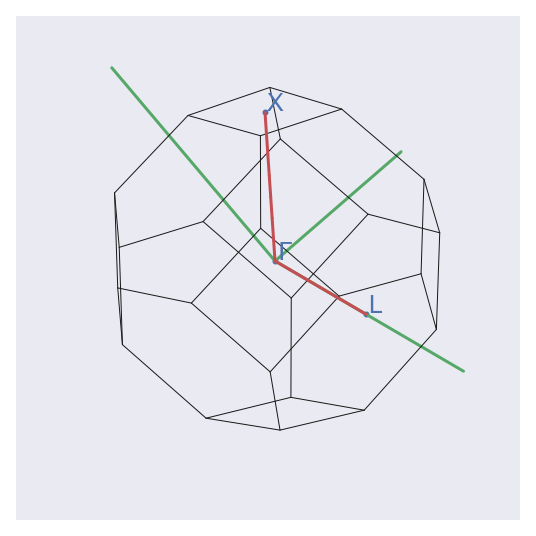

In [95]:
gsr_kpath.ebands.kpoints.plot();

#### To plot the band structure, use:

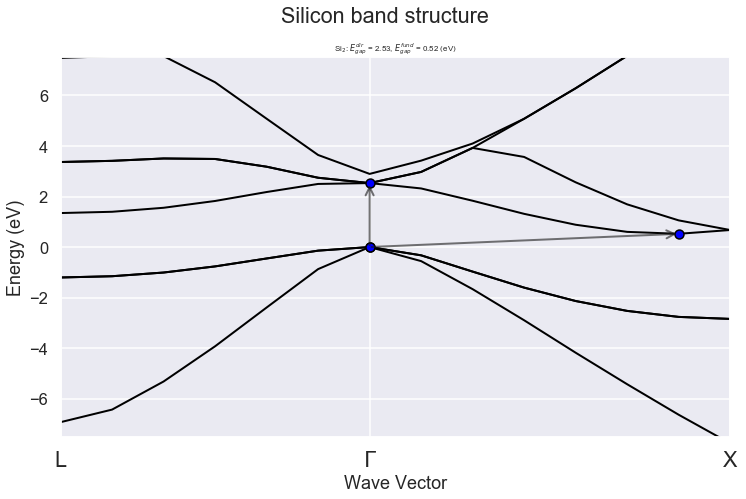

In [96]:
gsr_kpath.ebands.plot(with_gaps=True, title="Silicon band structure");

#### Band energies can be given either along a k-path or in the irreducible Brillouin zone (IBZ):

In [97]:
with abilab.abiopen("si_scf_GSR.nc") as scf_gsr:
    ebands_kmesh = scf_gsr.ebands
    print(ebands_kmesh.kpoints)

K-mesh with divisions: [8, 8, 8], shifts: [0.0, 0.0, 0.0]
kptopt: 1 (Use space group symmetries and TR symmetry)
Number of points in the IBZ: 29
     0) [+0.000, +0.000, +0.000],  weight=0.002
     1) [+0.125, +0.000, +0.000],  weight=0.016
     2) [+0.250, +0.000, +0.000],  weight=0.016
     3) [+0.375, +0.000, +0.000],  weight=0.016
     4) [+0.500, +0.000, +0.000],  weight=0.008
     5) [+0.125, +0.125, +0.000],  weight=0.012
     6) [+0.250, +0.125, +0.000],  weight=0.047
     7) [+0.375, +0.125, +0.000],  weight=0.047
     8) [+0.500, +0.125, +0.000],  weight=0.047
     9) [-0.375, +0.125, +0.000],  weight=0.047
    10) [-0.250, +0.125, +0.000],  weight=0.047
    ... (More than 10 k-points)


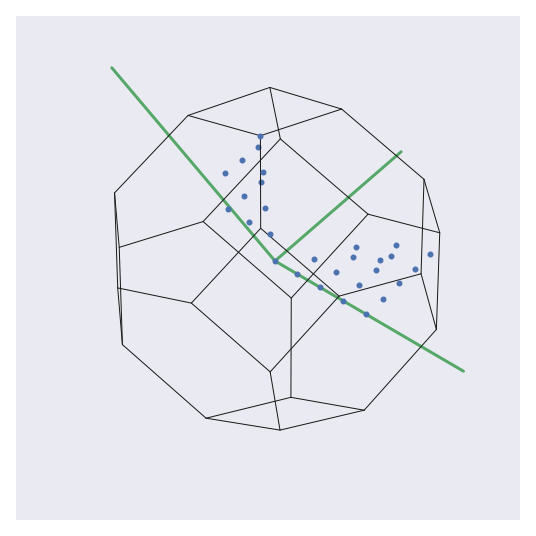

In [98]:
ebands_kmesh.kpoints.plot();

#### To compute the density of states (DOS), we need energies in the IBZ:

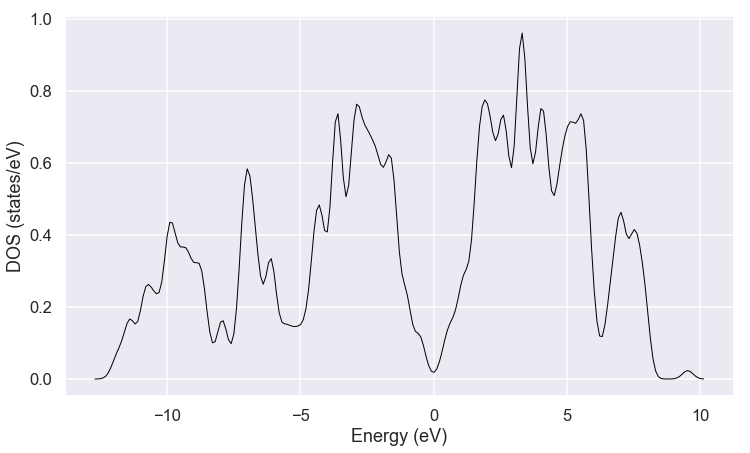

In [99]:
edos = ebands_kmesh.get_edos()
edos.plot();

#### Plotting bands with DOS is easy:

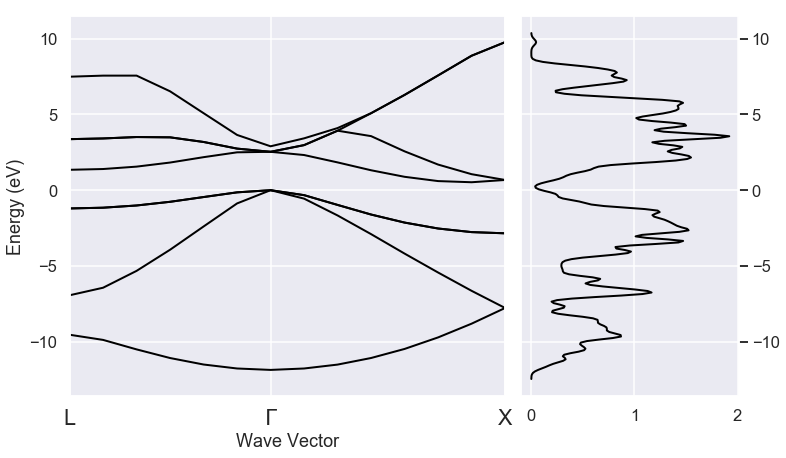

In [100]:
gsr_kpath.ebands.plot_with_edos(edos);

#### Use the *ElectronBandsPlotter* to visualize multiple band structures:

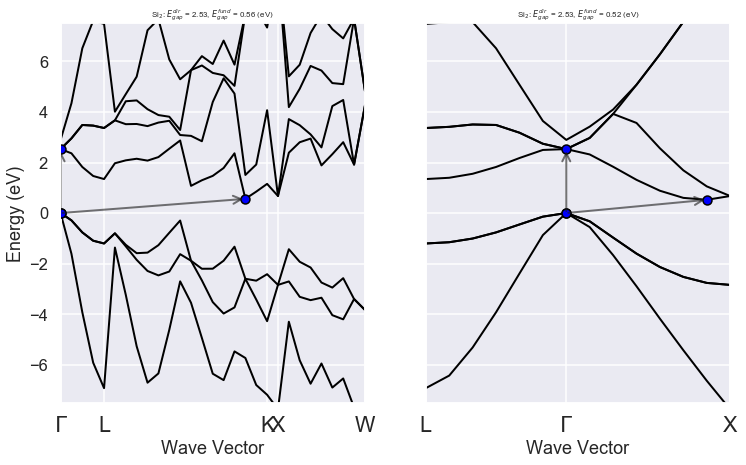

In [101]:
plotter = abilab.ElectronBandsPlotter()
plotter.add_ebands(label="BZ sampling", bands="si_scf_GSR.nc")
plotter.add_ebands(label="k-path", bands="si_nscf_GSR.nc")

plotter.gridplot(with_gaps=True);

##### We can also compute the DOS with the gaussian method and different broadening values

In [102]:
edos_plotter = ebands_kmesh.compare_gauss_edos(widths=[0.2, 0.3, 0.4], step=0.1)

##### and plot the results on the same figure with:

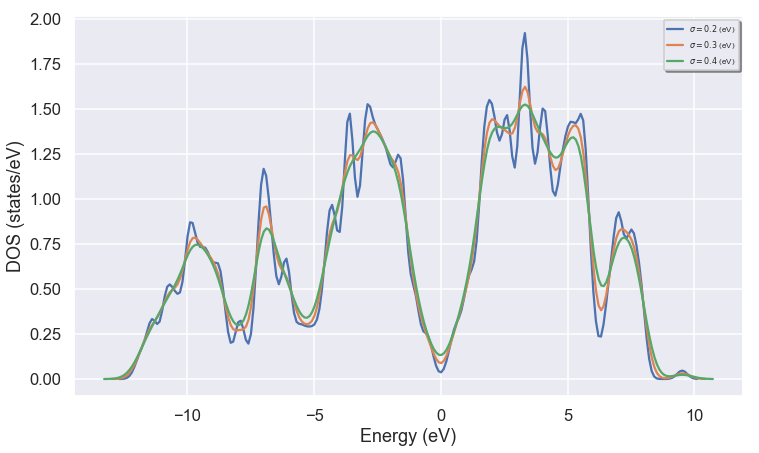

In [103]:
edos_plotter.combiplot();

#### while *gridplot* shows the results in a grid:

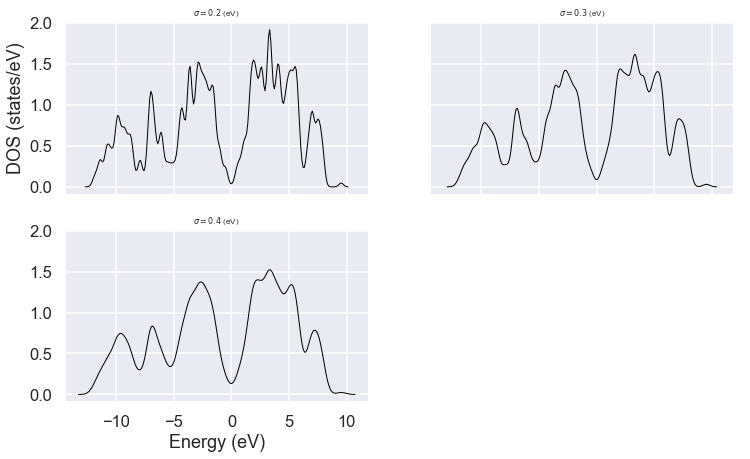

In [104]:
edos_plotter.gridplot();

## Other postprocessing tools for electrons

* GSR.nc: File with ground-state results produced by SCF/NSCF runs
* HIST.nc: File produced by structural relaxations and MD runs
* FATBANDS.nc: Plot electronic fatbands and L-projected DOS
* DDB: Tools to analyze phonons
* SIGRES.nc: How to analyze the results of GW calculations
* MDF.nc: How to analyze the results of Bethe-Salpeter calculations
* Lobster: How to analyze the output files produced by Lobster
* ABIWAN.nc: How to analyze the Wannier90 wout file and the netcdf file produced by Abinit

## Abipy Robots

* High-level interface to operate on multiple files with the same file extension

* Useful for:

     * convergence studies
     * producing multiple plots
     * building [Pandas dataframes](https://pandas.pydata.org/) (data in tabular format powered by python)

* Each *Robot* is associated to a file extension, *e.g.* 

     * GSR.nc ➝ *GsrRobot*
     * DDB ➝ *DdbRobot*
     
* *Robots* can be constructed from:

    1. List of filenames
    2. Directories and, optionally, regular expressions
    
* Command line interface provided by the *abicomp.py* script:


            abicomp.py gsr *GSR.nc --notebook

## Our first example with the GsrRobot

#### We have a directory with a bunch of  *GSR.nc* files and we need to analyze the results:

In [105]:
ls flow_base3_ngkpt

out0_GSR.nc  out1_GSR.nc  out2_GSR.nc  out3_GSR.nc


##### Let's construct a  *GsrRobot* with:

In [106]:
robot_enekpt = abilab.GsrRobot.from_dir("flow_base3_ngkpt");

##### Files can be accessed with list-like or dict-like syntax:

In [107]:
robot_enekpt.abifiles[0]

<GsrFile, flow_base3_ngkpt/out0_GSR.nc>

In [108]:
robot_enekpt["out0_GSR.nc"]

<GsrFile, flow_base3_ngkpt/out0_GSR.nc>

#### Now we can use the robot methods to build pandas *DataFrames*:


In [109]:
ene_table = robot_enekpt.get_dataframe()
print(ene_table.keys())

Index(['formula', 'natom', 'alpha', 'beta', 'gamma', 'a', 'b', 'c', 'volume',
       'abispg_num', 'spglib_symb', 'spglib_num', 'spglib_lattice_type',
       'energy', 'pressure', 'max_force', 'ecut', 'pawecutdg', 'tsmear',
       'nkpt', 'nsppol', 'nspinor', 'nspden'],
      dtype='object')


#### Jupyter knows how to visualize a *DataFrame*

In [110]:
ene_table

,formula,natom,alpha,beta,gamma,a,b,c,volume,abispg_num,...,energy,pressure,max_force,ecut,pawecutdg,tsmear,nkpt,nsppol,nspinor,nspden
out0_GSR.nc,Si2,2,60.0,60.0,60.0,3.866975,3.866975,3.866975,40.888292,227,...,-241.251546,-3.586342,3.051564e-27,8.0,-1.0,0.01,2,1,1,1
out1_GSR.nc,Si2,2,60.0,60.0,60.0,3.866975,3.866975,3.866975,40.888292,227,...,-241.417959,-3.907310,4.677360e-27,8.0,-1.0,0.01,10,1,1,1
out2_GSR.nc,Si2,2,60.0,60.0,60.0,3.866975,3.866975,3.866975,40.888292,227,...,-241.421158,-3.895679,0.000000e+00,8.0,-1.0,0.01,28,1,1,1
out3_GSR.nc,Si2,2,60.0,60.0,60.0,3.866975,3.866975,3.866975,40.888292,227,...,-241.421391,-3.895437,2.762091e-27,8.0,-1.0,0.01,60,1,1,1


In [111]:
ene_table[["energy", "pressure"]]

,energy,pressure
out0_GSR.nc,-241.251546,-3.586342
out1_GSR.nc,-241.417959,-3.907310
out2_GSR.nc,-241.421158,-3.895679
out3_GSR.nc,-241.421391,-3.895437


In [112]:
# The dataframe contains several columns but we are mainly interested 
# in the number of k-points nkpt and in the energy (given in eV). 
# Let's massage a bit the data to facilitate the post-processing:

#### Dataframes are great as we can use python to operate on the data:

In [113]:
ene_table.sort_values(by="nkpt", inplace=True)

# Add column with energies in Ha and another column with 
# the difference wrt to the last point.
ene_table["energy_Ha"] = ene_table["energy"] * abilab.units.eV_to_Ha
ene_table["ediff_Ha"] = ene_table["energy_Ha"] - ene_table["energy_Ha"][-1]

# Select columns with the syntax:
ene_table[["nkpt", "energy", "energy_Ha", "ediff_Ha"]]

,nkpt,energy,energy_Ha,ediff_Ha
out0_GSR.nc,2,-241.251546,-8.865831,0.006242
out1_GSR.nc,10,-241.417959,-8.871946,0.000126
out2_GSR.nc,28,-241.421158,-8.872064,0.000009
out3_GSR.nc,60,-241.421391,-8.872073,0.000000


* Dataframes can be exported to different formats: CSV, $Latex$, JSON, excel, ...
* High-level plotting interface provided by [seaborn](https://seaborn.pydata.org/)
* Explore your DataFrames inside jupyter notebooks with [qgrid](https://github.com/quantopian/qgrid)

In [114]:
#import qgrid
#qgrid.show_grid(ene_table)

#### We can also use the pandas built-in API to plot the data with matplotlib

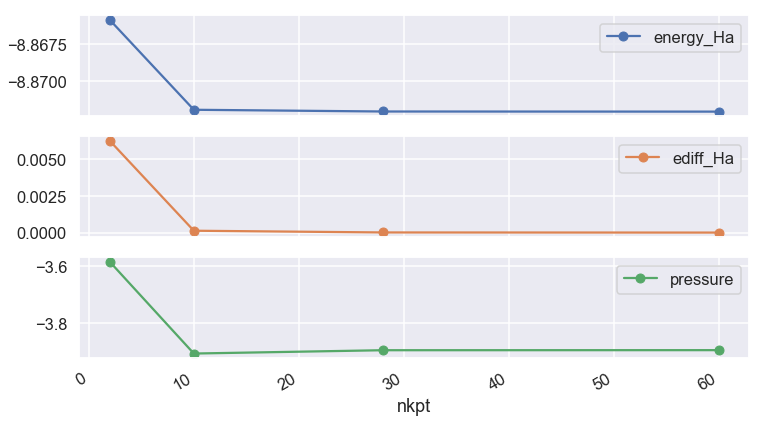

In [115]:
ene_table.plot(x="nkpt", y=["energy_Ha", "ediff_Ha", "pressure"], 
               style="-o", subplots=True);

#### We can also pass a function to compute the values  along the x-axis and sort the results:
<!-- The docstring of the function will be used as label of the x-axis: -->

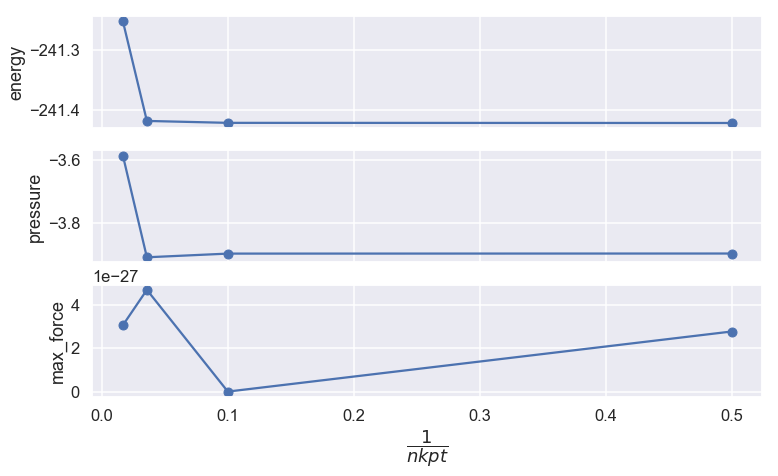

In [116]:
def inv_nkpt(abifile):
    r"""$\dfrac{1}{nkpt}$"""
    return 1.0 / abifile.nkpt
    
robot_enekpt.plot_gsr_convergence(sortby=inv_nkpt);    


* Command line interface provided by the *abicomp.py* script

https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/base3/lesson_base3.ipynb:

### Post-processing the DFPT results available in the MP database

* AbiPy, pymatgen and fireworks have been used by [Petretto et al](https://www.nature.com/articles/sdata201865) to compute the vibrational properties of more than 1500 compounds (and growing)
* The most important results  are available on the materials project website (including the DDB files) 

Let's assume we want to reuse the raw data for our research work.
Handling 1500 tabs in our browser is not feasible ➝ we need a **programmatic interface** to automate stuff. 

With python we can easily connect the different parts of the puzzle:

* Internet connection and REST API to retrieve the raw data (DDB)
* Computation of phonon, thermodinamical properties, Born effective charges, dielectric tensor, IR spectrum with ABINIT
* Post-processing with AbiPy

For a more comprehensive discussion see this 
[abitutorial](https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/ddb.ipynb)

<!--
The results for the rocksalt phase of MgO are available at https://materialsproject.org/materials/mp-1009129/
-->

#### To download a DDB file from the materials project database:

In [117]:
ddb = abilab.DdbFile.from_mpid("mp-1009129")
print(ddb)

================================= File Info =================================
Name: mp-1009129y_961zw__DDB
Directory: /var/folders/89/47k8wfdj11x035svqf8qnl4m0000gn/T
Size: 218.73 kb
Access Time: Tue Feb 12 01:14:26 2019
Modification Time: Tue Feb 12 01:14:26 2019
Change Time: Tue Feb 12 01:14:26 2019

================================= Structure =================================
Full Formula (Mg1 O1)
Reduced Formula: MgO
abc   :   2.908638   2.908638   2.656848
angles:  90.000000  90.000000 120.000000
Sites (2)
  #  SP           a         b    c
---  ----  --------  --------  ---
  0  Mg    0         0         0
  1  O     0.333333  0.666667  0.5

Abinit Spacegroup: spgid: 0, num_spatial_symmetries: 12, has_timerev: True, symmorphic: False

================================== DDB Info ==================================

Number of q-points in DDB: 72
guessed_ngqpt: [ 9  9 10] (guess for the q-mesh divisions made by AbiPy)
ecut = 44.000000, ecutsm = 0.000000, nkpt = 405, nsym = 12, usepaw

#### Once we have a *DdbFile* object, we can call *anaddb* to compute phonon bands and DOS:

In [118]:
# Return PHBST and PHDOS netcdf files.
phbstnc, phdosnc = ddb.anaget_phbst_and_phdos_files(
    ndivsm=20, nqsmall=20, lo_to_splitting=True, asr=2, 
    chneut=1, dipdip=1, dos_method="tetra")

#### and extract the phonon bands and the phonon DOS objects with:

In [119]:
phbands = phbstnc.phbands
phdos = phdosnc.phdos

In [120]:
print(phbands)

================================= Structure =================================
Full Formula (Mg1 O1)
Reduced Formula: MgO
abc   :   2.908638   2.908638   2.656848
angles:  90.000000  90.000000 120.000000
Sites (2)
  #  SP           a         b    c
---  ----  --------  --------  ---
  0  Mg    0         0         0
  1  O     0.333333  0.666667  0.5

Abinit Spacegroup: spgid: 0, num_spatial_symmetries: 12, has_timerev: True, symmorphic: False

Number of q-points: 345
Atomic mass units: {12.0: 24.305, 8.0: 15.9994}
Has non-analytical contribution for q --> 0: True


#### To plot the q-path:

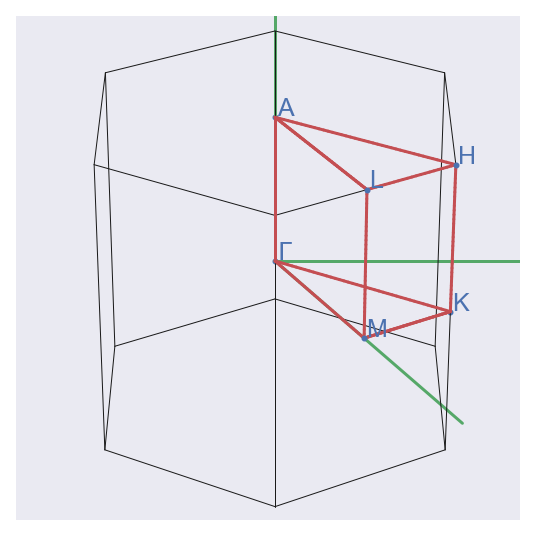

In [121]:
phbands.qpoints.plot();

#### To plot the phonon band structure:

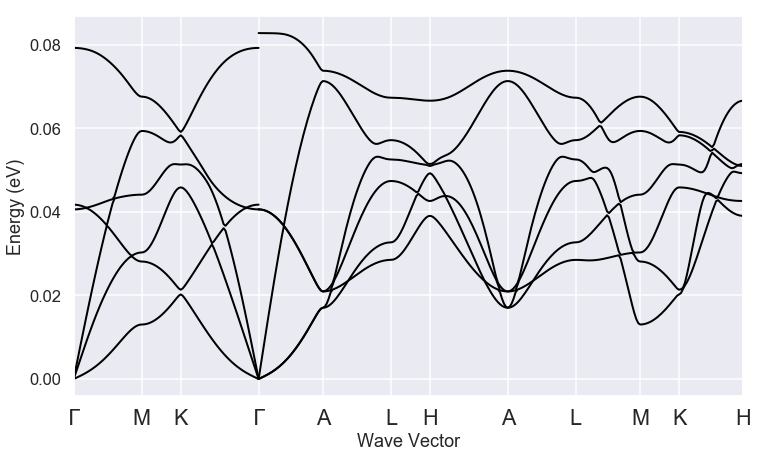

In [122]:
phbands.plot();

#### To plot the DOS and the integrated density of states (IDOS):

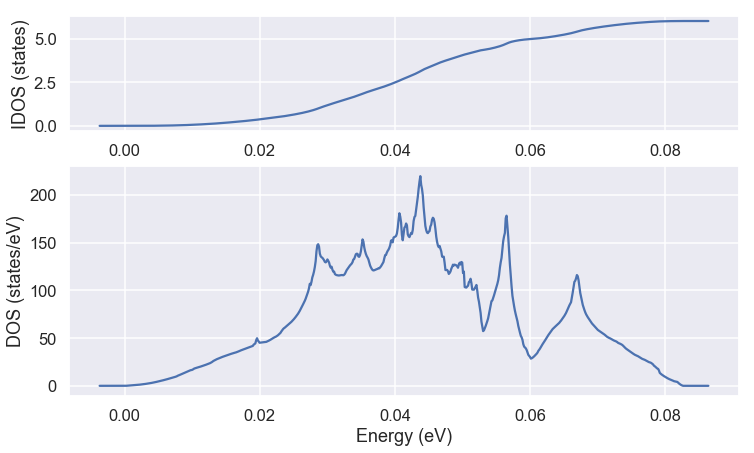

In [123]:
phdos.plot();

#### We can also plot the phonon bands and the DOS on the same figure with:

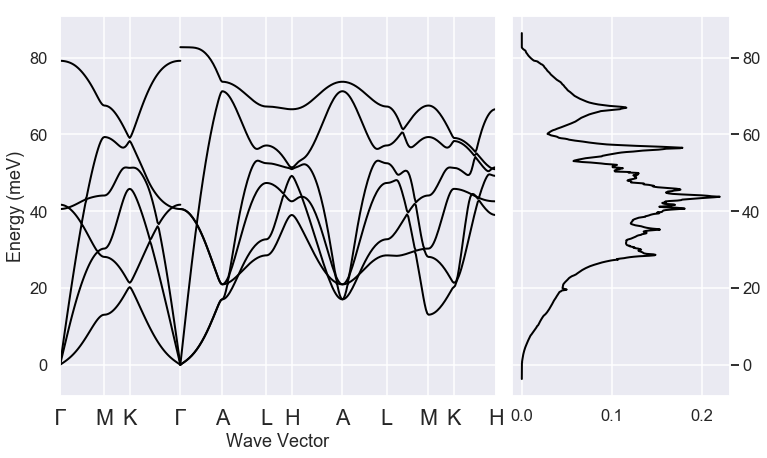

In [124]:
phbands.plot_with_phdos(phdos, units="meV");

## How to use DdbRobot to perform convergence studies

<!--
We have performed DFPT calculations for a metallic system ($MgB_2$) and we 
are interested in the effect of the k-sampling and the smearing on the vibrational properties.
-->
##### Let's use the *DdbRobot* to compare phonons obtained with different k-meshes and smearing values:

In [125]:
paths = [
    "mgb2_888k_0.01tsmear_DDB",
    "mgb2_888k_0.04tsmear_DDB",
    "mgb2_121212k_0.01tsmear_DDB",
    "mgb2_121212k_0.04tsmear_DDB",
]

paths = [os.path.join(abidata.dirpath, "refs", "mgb2_phonons_nkpt_tsmear", f) 
         for f in paths]

robot = abilab.DdbRobot()
for i, path in enumerate(paths):
    robot.add_file(path, path)

In [126]:
# Define function to change labels:
func = lambda ddb: "nkpt: %s, tsmear: %.2f" % (
    ddb.header["nkpt"], ddb.header["tsmear"])

robot.remap_labels(func)
robot

Label                    Relpath
-----------------------  -----------------------------------------------------------------------------
nkpt: 256, tsmear: 0.01  ../abipy/abipy/data/refs/mgb2_phonons_nkpt_tsmear/mgb2_888k_0.01tsmear_DDB
nkpt: 256, tsmear: 0.04  ../abipy/abipy/data/refs/mgb2_phonons_nkpt_tsmear/mgb2_888k_0.04tsmear_DDB
nkpt: 864, tsmear: 0.01  ../abipy/abipy/data/refs/mgb2_phonons_nkpt_tsmear/mgb2_121212k_0.01tsmear_DDB
nkpt: 864, tsmear: 0.04  ../abipy/abipy/data/refs/mgb2_phonons_nkpt_tsmear/mgb2_121212k_0.04tsmear_DDB

<!-- We are usually interested in the convergence behavior with respect to one or two parameters of 
the calculations.-->

#### Let's build a dataframe with the most important parameters:

In [127]:
robot.get_params_dataframe()

,nkpt,nsppol,ecut,tsmear,occopt,ixc,nband,usepaw
"nkpt: 256, tsmear: 0.01",256,1,35.0,0.01,4,1,8,0
"nkpt: 256, tsmear: 0.04",256,1,35.0,0.04,4,1,8,0
"nkpt: 864, tsmear: 0.01",864,1,35.0,0.01,4,1,8,0
"nkpt: 864, tsmear: 0.04",864,1,35.0,0.04,4,1,8,0


#### and check that all DDBs have been computed with the same crystalline structure:

In [128]:
robot.get_lattice_dataframe()

,formula,natom,alpha,beta,gamma,a,b,c,volume,abispg_num,spglib_symb,spglib_num,spglib_lattice_type
"nkpt: 256, tsmear: 0.01",Mg1 B2,3,90.0,90.0,120.0,3.086,3.086,3.523,29.055953,0,P6/mmm,191,hexagonal
"nkpt: 256, tsmear: 0.04",Mg1 B2,3,90.0,90.0,120.0,3.086,3.086,3.523,29.055953,0,P6/mmm,191,hexagonal
"nkpt: 864, tsmear: 0.01",Mg1 B2,3,90.0,90.0,120.0,3.086,3.086,3.523,29.055953,0,P6/mmm,191,hexagonal
"nkpt: 864, tsmear: 0.04",Mg1 B2,3,90.0,90.0,120.0,3.086,3.086,3.523,29.055953,0,P6/mmm,191,hexagonal


#### To analyze the effect of the k-sampling and the smearing on the vibrational properties:

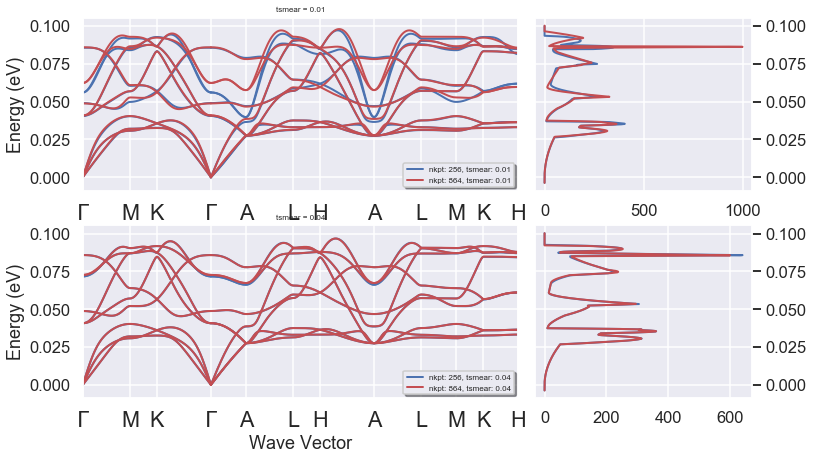

In [129]:
# Invoke anaddb and store results in `r`
r = robot.anaget_phonon_plotters(nqsmall=2)

r.phbands_plotter.gridplot_with_hue("tsmear", with_dos=True);

$MgB_2$ is a (conventional) superconductor with $T_c \approx ??$ so it's not so strange
that phonons are quite sensitive to the sampling of the Fermi surface...

## Phonon and thermodynamical properties on the Materials Project database

* Phonon frequencies and displacements
* Thermodynamic quantities
* Born Effective Charges    
* Dielectric Tensor
* Abinit DDB files

### Computation details

PBEsol norm-conserving pseudopotentials (PseudoDojo v0.3)

The plane wave cutoff is chosen based on the hardest element for each compound, according to the values suggested in the PseudoDojo table. The Brillouin zone has been sampled using equivalent k-point and q-point grids that respect the symmetries of the crystal with a density of approximately 1500 points per reciprocal atom and the q-point grid is always Γ-centered [9].

All the structures are relaxed with strict convergence criteria, i.e. until all the forces on the atoms are below 10-6 Ha/Bohr and the stresses are below 10-4 Ha/Bohr3.

The primitive cells and the band structures are defined according to the conventions of Setyawan and Curtarolo [10].

#### Python code to visualize electronic and vibrational properties from the MP database:

In [130]:
def plot_electrons_and_phonons(mpids):
    # Construct AbiPy ebands from mpids
    ebands_list = [abilab.ElectronBands.from_mpid(mpid) for mpid in mpids]

    # Get DDB files from the MP website and run anaddb to get phonon bands.
    phbands_list = []
    for i, mpid in enumerate(mpids):
        ddb = abilab.DdbFile.from_mpid(mpid)
        # Call anaddb to compute phonon bands
        phbst, _ = ddb.anaget_phbst_and_phdos_files(nqsmall=0)
        phbands_list.append(phbst.phbands)
        phbst.close()

    # Build matplotlib grid. The figure has (len(mpids), 2) subplots
    nrows, ncols = len(mpids), 2
    ax_mat, fig, plt = abilab.get_axarray_fig_plt(None, nrows=nrows, ncols=ncols,
                                                  sharex=False, sharey=False, 
                                                  squeeze=False)
    
    for i, (ebands, phbands) in enumerate(zip(ebands_list, phbands_list)):
        ebands.plot(ax=ax_mat[i, 0], with_gaps=True, ylims=(-5, 10), 
                    max_phfreq=phbands.maxfreq, show=False)
        phbands.plot(ax=ax_mat[i, 1], show=False)

        # Hide xlabel if not last row.
        if i != len(ebands_list) - 1:
            for ax in ax_mat[i]:
                ax.xaxis.label.set_visible(False)

    return fig

In [131]:
# Use the `ax` keyword argument to select the matplotlib Axes used to plot the object.
    # In the band structure plot, we show the fundamental/direct gap as well as the possible
    # phonon-absorption (-emission) processes allowed by energy-conservation.
    # (This is a qualitative analysis of e-ph scattering, quasi-momentum and ph dispersion are not taken into account).

Structure object does not have symmetry operations computed from Abinit.
Calling spglib to get symmetry operations.
Structure object does not have symmetry operations computed from Abinit.
Calling spglib to get symmetry operations.


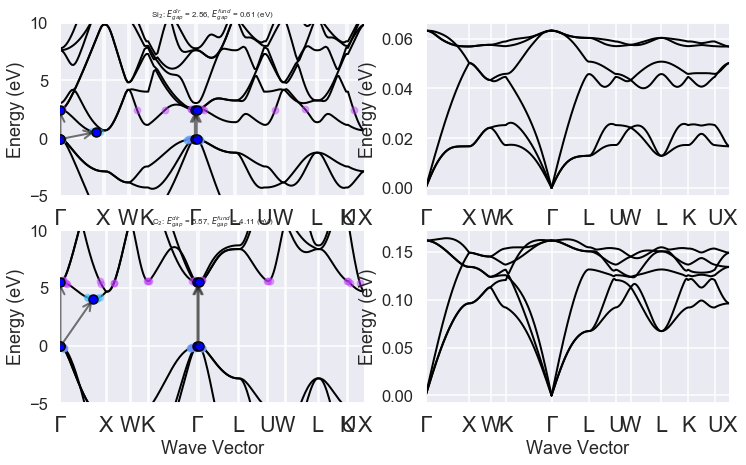

In [132]:
# List of mp ids for Si and Diamond
mpids = ["mp-149", "mp-66"]
plot_electrons_and_phonons(mpids);

# How to automate Input File Generation with AbiPy

<img src="./assets/automate_input_files.jpg" width="85%" align="center">

## *AbinitInput* object 

Programmatic interface to generate input files:

* *Dict-like* object storing ABINIT variables 
* Methods to set multiple variables (*e.g.* **k**-path from *structure*)
* Factory functions to generate input files with minimal effort

Can invoke ABINIT to get important parameters such as:

  * list of **k**-points in the IBZ
  * list of irreducible DFPT perturbations
  * list of possible configurations for MPI calculations
     
#### To build an input, we need a *structure* and a list of *pseudos*:

In [133]:
inp = abilab.AbinitInput(structure="si.cif", pseudos="14si.pspnc")

#### Low-level API (should look familiar to Abinit users):

In [134]:
inp["ecut"] = 8
"ecut" in inp

True

#### Use *set_vars* to set the value of several variables with a single call:

In [135]:
inp.set_vars(kptopt=1, 
             ngkpt=[2, 2, 2], 
             nshiftk=2, 
             shiftk=[0.0, 0.0, 0.0, 0.5, 0.5, 0.5]  # 2 shifts in one list
            )

{'kptopt': 1,
 'ngkpt': [2, 2, 2],
 'nshiftk': 2,
 'shiftk': [0.0, 0.0, 0.0, 0.5, 0.5, 0.5]}

#### but the same results can be obtained with a single call:

In [136]:
inp.set_autokmesh(nksmall=2)

{'ngkpt': array([2, 2, 2]),
 'kptopt': 1,
 'nshiftk': 4,
 'shiftk': array([[0.5, 0.5, 0.5],
        [0.5, 0. , 0. ],
        [0. , 0.5, 0. ],
        [0. , 0. , 0.5]])}

####  The method builds a homogeneous k-mesh from metavariables:

* *nksmall* is the number of divisions to be used to sample the smallest lattice vector
* *shiftk* is automatically selected from an internal database.

#### An *AbinitInput* has a structure object 

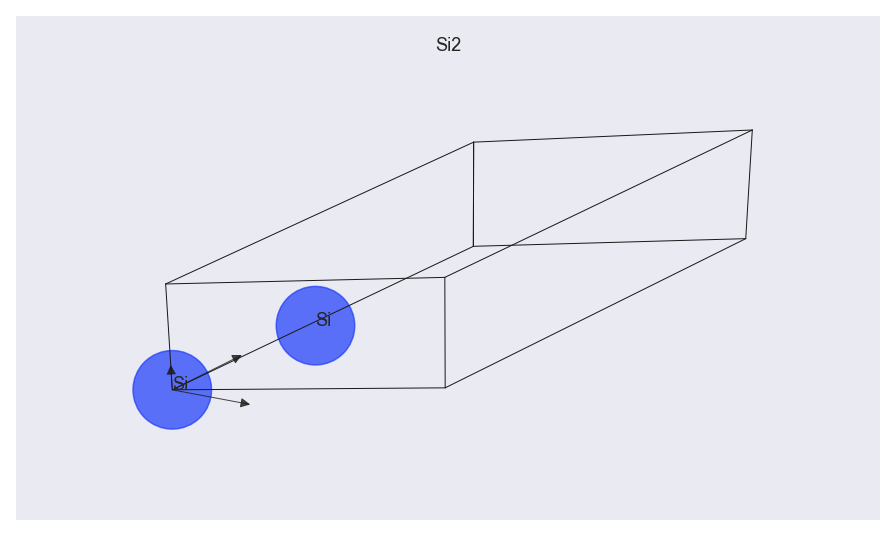

In [137]:
inp.structure.plot();

#### and a list of pseudopotentials

In [138]:
for pseudo in inp.pseudos:
    print(pseudo)

<NcAbinitPseudo: 14si.pspnc>
  summary: Troullier-Martins psp for element  Si        Thu Oct 27 17:31:21 EDT 1994
  number of valence electrons: 4.0
  maximum angular momentum: d
  angular momentum for local part: d
  XC correlation: LDA_XC_TETER93
  supports spin-orbit: False
  radius for non-linear core correction: 1.80626423934776
  hint for low accuracy: ecut: 0.0, pawecutdg: 0.0
  hint for normal accuracy: ecut: 0.0, pawecutdg: 0.0
  hint for high accuracy: ecut: 0.0, pawecutdg: 0.0


#### Pseudos from the [PseudoDojo project](http://www.pseudo-dojo.org/) provide hints for the cutoff energy.


```python
from pseudo_dojo.core.pseudos import OfficialDojoTable
pseudo_table = OfficialDojoTable.from_dojodir('ONCVPSP-PBEsol-PDv0.4','standard')
```

#### Inside the jupyter notebook, you get the HTML version with links to documentation:

In [139]:
inp

<AbinitInput at 120914343304>

#### To generate a high-symmetry k-path (taken from an internal database)

In [140]:
inp.set_kpath(ndivsm=10)

{'kptbounds': array([[0.   , 0.   , 0.   ],
        [0.5  , 0.   , 0.5  ],
        [0.5  , 0.25 , 0.75 ],
        [0.375, 0.375, 0.75 ],
        [0.   , 0.   , 0.   ],
        [0.5  , 0.5  , 0.5  ],
        [0.625, 0.25 , 0.625],
        [0.5  , 0.25 , 0.75 ],
        [0.5  , 0.5  , 0.5  ],
        [0.375, 0.375, 0.75 ],
        [0.625, 0.25 , 0.625],
        [0.5  , 0.   , 0.5  ]]), 'kptopt': -11, 'ndivsm': 10, 'iscf': -2}

* Ten points to sample the smallest segment
* Other segments are sampled so that proportions are preserved

### Inside jupyter, one can get the HTML documentation with:

In [141]:
abilab.docvar("ecut")

ecut  <Energy CUToff>

## Interfacing Abinit with Python via *AbinitInput*

* Once you have an *AbinitInput*, it is possible to execute Abinit to get useful information or simply to validate the input file before running the calculation. 
* All the method that invoke Abinit starts with the abi prefix followed by a verb e.g. abiget or abivalidate.


NOTE: This steps requires a *manager.yml* configuration file!

* For futher info consult the [documentation(https://abinit.github.io/abipy/workflows/taskmanager.html)

* Examples of configurations files are available [here(https://abinit.github.io/abipy/workflows/manager_examples.html)

#### To get the k-points in the irreducible zone with:

In [142]:
ibz = inp.abiget_ibz()

print("Number of k-points:", len(ibz.points))
print("Weights normalized to:", ibz.weights.sum())
n = min(5, len(ibz.points))
for i, (k, w) in enumerate(zip(ibz.points[:n], ibz.weights[:n])):
    print(i, "kpt:", k, "weight:", w)
if n != len(ibz.points): print("...")

Number of k-points: 198
Weights normalized to: 198.0
0 kpt: [0. 0. 0.] weight: 1.0
1 kpt: [0.01785714 0.         0.01785714] weight: 1.0
2 kpt: [0.03571429 0.         0.03571429] weight: 1.0
3 kpt: [0.05357143 0.         0.05357143] weight: 1.0
4 kpt: [0.07142857 0.         0.07142857] weight: 1.0
...


#### To get the list of possible MPI parallel configurations for this input up to 5 max_ncpus:

In [143]:
inp["paral_kgb"] = 1
pconfs = inp.abiget_autoparal_pconfs(max_ncpus=5)
print("Best efficiency:\n", pconfs.sort_by_efficiency()[0])
print("Best speedup:\n", pconfs.sort_by_speedup()[0])

Best efficiency:
 {'efficiency': 0.98,
 'mem_per_cpu': 0.0,
 'mpi_ncpus': 3,
 'omp_ncpus': 1,
 'tot_ncpus': 3,
 'vars': {'bandpp': 1,
          'npband': 1,
          'npfft': 1,
          'npimage': 1,
          'npkpt': 3,
          'npspinor': 1}}

Best speedup:
 {'efficiency': 0.969,
 'mem_per_cpu': 0.0,
 'mpi_ncpus': 5,
 'omp_ncpus': 1,
 'tot_ncpus': 5,
 'vars': {'bandpp': 1,
          'npband': 1,
          'npfft': 1,
          'npimage': 1,
          'npkpt': 5,
          'npspinor': 1}}



#### To get the list of irreducible phonon perturbations for a given q-point:

In [144]:
inp.abiget_irred_phperts(qpt=(0.25, 0, 0))

[{'qpt': [0.25, 0.0, 0.0], 'ipert': 1, 'idir': 1},
 {'qpt': [0.25, 0.0, 0.0], 'ipert': 1, 'idir': 2}]

#### To get the irreducible perturbations for strain:

In [145]:
inp.abiget_irred_strainperts()

[{'qpt': [0.0, 0.0, 0.0], 'ipert': 1, 'idir': 1},
 {'qpt': [0.0, 0.0, 0.0], 'ipert': 5, 'idir': 1},
 {'qpt': [0.0, 0.0, 0.0], 'ipert': 5, 'idir': 2},
 {'qpt': [0.0, 0.0, 0.0], 'ipert': 5, 'idir': 3},
 {'qpt': [0.0, 0.0, 0.0], 'ipert': 6, 'idir': 1},
 {'qpt': [0.0, 0.0, 0.0], 'ipert': 6, 'idir': 2},
 {'qpt': [0.0, 0.0, 0.0], 'ipert': 6, 'idir': 3}]

* DFPT perturbations are independent hence jobs can be executed in parallel
* These methods represent the **building block** to generate highly parallel workflows.
<!-- div class="alert alert-info"> </div -->

## Multiple Datasets

* List of AbinitInput objects. 
* Handy when you have to generate several input files sharing several common variables e.g. the crystalline structure, the smearing value etc... 

<!-- 
Note however that Abipy workflows do not support input files with more than one dataset.

A MultiDataset is essentially a list of AbinitInput objects 
with handy methods to perform global modifications.
i.e. changes that will affect all the inputs in the MultiDataset
For example:
-->

#### Let's build a *MultiDataset* containing two datasets:

In [146]:
multi = abilab.MultiDataset(structure="si.cif", pseudos="14si.pspnc", ndtset=2)

multi.set_vars(ecut=4)

[{'ecut': 4}, {'ecut': 4}]

Iterating over *multi* gives *AbinitInput* objects:

In [147]:
all(inp["ecut"] == 4 for inp in multi)

True

#### To change the values in a particular dataset use:

In [148]:
multi[0].set_vars(ngkpt=[2, 2, 2], tsmear=0.004)
multi[1].set_vars(ngkpt=[4, 4, 4], tsmear=0.008)

{'ngkpt': [4, 4, 4], 'tsmear': 0.008}

#### To get a dataframe with the values of the variables, use:

In [149]:
multi.get_vars_dataframe("ngkpt", "tsmear")

,ngkpt,tsmear
dataset 0,"[2, 2, 2]",0.004
dataset 1,"[4, 4, 4]",0.008


The function split_datasets return the list of AbinitInput stored in MultiDataset

## Factory functions for typical calculations

* Functions returning *AbinitInput* or *MultiDataset* 
  depending on the calculation type
* Minimal input from user: 
     * *structure* object
     * *pseudos* list
     * *metavariables* e.g. kppra for BZ sampling
* Default values designed to cover the most common scenarios
* It is always possible to change the default behaviour either by passing these options to the factory function or by changing the objects returned by the factory.
* For a command line interface, use the *abinp.py* script.

<!--
* One can use the factories to generate automatically input files
  or call these functions to build workflows for high-throughput applications

Note that the default values do not always correspond to the default behaviour of Abinit. In particular, the majority of the factory functions construct input files for spin-polarized calculations (nsppol=2) with a Fermi-Dirac occupation scheme and a physical temperature of 0.1 eV. 
Also note that the factory functions do not use get* or ird* variables to connect the different steps. Client code is in charge of connecting the different parts. 
-->

<hr>

### Some examples...

### Input file for band structure calculation + DOS

1. GS run to get the density 
2. NSCF run with k-points along high-symmetry k-path 
3. NSCF run on a k-mesh to compute the DOS

In [150]:
multi = abilab.ebands_input(structure="si.cif", 
                            pseudos="14si.pspnc",
                            ecut=8, 
                            spin_mode="unpolarized", 
                            smearing=None, 
                            dos_kppa=5000)

#### To build an input for SCF+NSCF run with (relaxed) structure taken from the materials project database:

        abinp.py ebands mp-149          

#### $GW$ calculations with the plasmon-pole model. The calculation consists of:

1. GS run to get the density followed by a 
2. nscf-run to compute the WFK file with *nscf_nband* states.

In [151]:
kppa = 1000
ecut = ecutsigx = 8
ecuteps = 2
nscf_nband = 50

multi = abilab.g0w0_with_ppmodel_inputs(
    "si.cif", "14si.pspnc", kppa, nscf_nband, ecuteps, ecutsigx,
    ecut=ecut, smearing=None, spin_mode="unpolarized")

* *nscf_nband*  ➝ number of bands in $GW$ (occ + empty)
* *ecuteps* ➝ planewave cutoff for $W_{G, G'}$ in Hartree 
* *ecutsigx* ➝ cutoff energy for the exchange part $\Sigma_x$
* *kppa* ➝ k-point sampling

## Command line interface

<img src="./assets/python_cli.jpg" width="85%" align="center">

## Command line interface

    
* *abistruct.py* ➝ to operate on crystalline structures read from file
* *abiopen.py* ➝ to open output files inside Ipython session
* *abicomp.py* ➝ to compare multiple files (convergence studies)
* *abiview.py* ➝ for a quick visualization of output files
* *abinp.py* ➝ to generate input files for typical calculations. 
    

Use e.g. 

* `abistruct.py --help` for manpage
* `abistruct.py COMMAND --help` for help about `COMMAND`

<hr>

HTML documentation available at http://abinit.github.io/abipy/scripts/index.html

#### Read structure from FILE and use [spglib](https://atztogo.github.io/spglib/) to analyze symmetries

In [152]:
!abistruct.py spglib si_scf_GSR.nc

Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000

Spglib space group info (magnetic symmetries not taken into account).
Spacegroup: Fd-3m (227), Hall: F 4d 2 3 -1d, Abinit spg_number: 227
Crystal_system: cubic, Lattice_type: cubic, Point_group: m-3m

  Idx  Symbol    Reduced_Coords              Wyckoff      EqIdx
-----  --------  --------------------------  ---------  -------
    0  Si        +0.00000 +0.00000 +0.00000  (2b)             0
    1  Si        +0.25000 +0.25000 +0.25000  (2b)             0


#### Convert structure from netcdf format to CIF

In [153]:
!abistruct.py convert si_scf_GSR.nc -f cif

# generated using pymatgen
data_Si
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   3.86697464
_cell_length_b   3.86697464
_cell_length_c   3.86697464
_cell_angle_alpha   60.00000000
_cell_angle_beta   60.00000000
_cell_angle_gamma   60.00000000
_symmetry_Int_Tables_number   1
_chemical_formula_structural   Si
_chemical_formula_sum   Si2
_cell_volume   40.88829228
_cell_formula_units_Z   2
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  Si  Si1  1  0.000000  0.000000  0.000000  1
  Si  Si2  1  0.250000  0.250000  0.250000  1



#### Connect to the materials project database. Get structures corresponding to a chemical system or formula e.g. `Fe2O3` or `Li-Fe-O` or `Ir-O-*` for wildcard pattern matching.

<!--
Print info and Abinit input files. Use e.g. `-f POSCAR`
to change output format. `-f None` to disable structure output.
-->

In [154]:
!abistruct.py mp_match si_scf_GSR.nc


# Found 1 structures in Materials Project database (use `verbose` to get further info)

 
########################## abivars input for mp-149 ##########################
# Full Formula (Si2)
# Reduced Formula: Si
# abc   :   3.866975   3.866975   3.866975
# angles:  60.000000  60.000000  60.000000
# 
# Spglib space group info (magnetic symmetries not taken into account).
# Spacegroup: Fd-3m (227), Hall: F 4d 2 3 -1d, Abinit spg_number: None
# Crystal_system: cubic, Lattice_type: cubic, Point_group: m-3m
# 
#   Idx  Symbol    Reduced_Coords              Wyckoff      EqIdx
# -----  --------  --------------------------  ---------  -------
#     0  Si        +0.87500 +0.87500 +0.87500  (2b)             0
#     1  Si        +0.12500 +0.12500 +0.12500  (2b)             0

 natom 2
 ntypat 1
 typat 1 1
 znucl 14
 xred
    0.8750000000    0.8750000000    0.8750000000
    0.1250000000    0.1250000000    0.1250000000
 acell    1.0    1.0    1.0
 rprim
    6.3285005334    0.0000000000    3.653761

In [155]:
!abistruct.py mp_search LiF


# Found 2 structures in Materials Project database (use `verbose` to get further info)

           pretty_formula  e_above_hull  energy_per_atom  \
mp-1009009            LiF      0.273111        -4.572031   
mp-1138               LiF      0.000000        -4.845142   

            formation_energy_per_atom  nsites     volume spacegroup.symbol  \
mp-1009009                  -2.907769       2  16.768040             Pm-3m   
mp-1138                     -3.180880       2  17.022154             Fm-3m   

            spacegroup.number  band_gap  total_magnetization material_id  \
mp-1009009                221    7.5593         0.000000e+00  mp-1009009   
mp-1138                   225    8.7161         9.000000e-07     mp-1138   

                   a         b         c  alpha  beta  gamma  
mp-1009009  2.559533  2.559533  2.559533   90.0  90.0   90.0  
mp-1138     2.887419  2.887419  2.887419   60.0  60.0   60.0  
 
 
######################## abivars input for mp-1009009 ###################

In [156]:
!abistruct.py lgk si_scf_GSR.nc  -k 0.25 0 0


================================= Structure =================================
Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000

Spglib space group info (magnetic symmetries not taken into account).
Spacegroup: Fd-3m (227), Hall: F 4d 2 3 -1d, Abinit spg_number: 227
Crystal_system: cubic, Lattice_type: cubic, Point_group: m-3m

  Idx  Symbol    Reduced_Coords              Wyckoff      EqIdx
-----  --------  --------------------------  ---------  -------
    0  Si        +0.00000 +0.00000 +0.00000  (2b)             0
    1  Si        +0.25000 +0.25000 +0.25000  (2b)             0


================================ Little Group ================================
Kpoint-group: 3m, C3v (156), Kpoint: [0.25, 0.0, 0.0], Symmorphic: True
 
C3v    1+ [1]   3+ [2]  -2+ [3]
Irrep                          
A1     (1+0j)   (1+0j)   (1+0j)
A2     (1+0j)   (1+0j)  (-1+0j)
E      (2+0j)  (-1+0j)       0j



#### Print info about ground-state calculation 

In [157]:
!abiopen.py si_scf_GSR.nc --print

================================= File Info =================================
Name: si_scf_GSR.nc
Directory: /Users/gmatteo/git_repos/abipy_slides_aps_boston_2019
Size: 14.83 kb
Access Time: Tue Feb 12 01:16:15 2019
Modification Time: Tue Jan 15 23:04:41 2019
Change Time: Tue Jan 15 23:04:41 2019

================================= Structure =================================
Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c  cartesian_forces
---  ----  ----  ----  ----  -----------------------------------------------------------
  0  Si    0     0     0     [-5.89948302e-27 -1.93366148e-27  2.91016902e-27] eV ang^-1
  1  Si    0.25  0.25  0.25  [ 5.89948302e-27  1.93366148e-27 -2.91016902e-27] eV ang^-1

Abinit Spacegroup: spgid: 227, num_spatial_symmetries: 48, has_timerev: True, symmorphic: True

Stress tensor (Cartesian coordinates in GPa):
[[5.21161758e+00 7.86452261e-11 0.00

#### To produce a predefined set of matplotlib figures, use *abiopen* with the `--expose` option:

```sh

    abiopen.py si_nscf_GSR.nc --expose
    
```

<img src="assets/abiopen_expose.png" width="75%" align="center" alt="abiopen_expose">

## The PseudoDojo project

* Tables of norm-conserving and PAW pseudopotentials
* Intensively tested (delta-gauge, GBRV benchmark set, ghost-states, phonons)
* Different XC flavors (LDA, GGA-PBE, PBE-sol)
* Hints for cutoff energy computed from validation tests
* Several formats (psp8, upf, psxml, pawxml) compatible with 
  Abinit, QE, siesta, GPAW, octopus ...
* Several electronic configurations:

    * *standard* for GS/DFPT applications
    * *stringent* for high-accuracy and many-body calculations (e.g. closed shell for $GW$)

<img src="./assets/pseudodojo_validation_results.png" width="75%" align="center">

* Files and jupyter notebooks are available at http://www.pseudo-dojo.org/
* Github repository with python code to run validation tests

<a href="http://www.pseudo-dojo.org/">
<img src="assets/pseudodojo.png" alt="PseudoDojo website" align="center">
</a>

<img src="assets/managing-workflow.jpg">

## Workflow infrastructure

Two different approaches:

#### AbiPy workflows:

   * Lightweight implementation (*pymatgen* + *AbiPy*)
   * No database required. Object persistence provided by [*pickle*](https://docs.python.org/3/library/pickle.html)
   * Ideal tool for prototyping 
    
    
#### AbiFlows workflows: 

   * Requires [MongoDb](https://www.mongodb.com/) database
   * Based on [fireworks](https://materialsproject.github.io/fireworks/)
   * Designed and optimized for high-throughput applications
   
<hr>

Both approaches share the same codebase (*AbinitInput*, factory functions, AbiPy objects).

Number and type of calculations are important ➝ choose the approach that suits to your needs.

## Main features

* Support for different resource managers (Slurm, PBS, ...)
* Automatic parallelism: the number of MPI/OpenMP processes is computed/optimized at runtime
* Error handlers for common runtime failures
* Iterative algorithms are automatically restarted by the framework

<img src="./assets/not_converged_task_2.png" width="45%" align="center">

## Object-oriented API and inheritance diagram

* Tasks object to handle different types of calculations

* Handling of the dependencies (wavefunction, densities, DDB,. . . )
* Workflows generators for common cases

   * Relaxation
   * Band structures
   * Phonons

* Templates for database insertion based on *mongoengine* and *mongodb* documents

<img src="./assets/class_hierarchy.png" width="70%" align="center">

<!-- 
* Automatized choice of number of cores (*autoparal*)
* Error handling
-->

<img src="./assets/mongoengine_logo.png" width="50%" align="center">

#### Document-Object Mapper 

   * Like ORM but for document databases
   * Mixins for standard quantities
   * Document associated with workflows
   * Standardized output

abiflows.database.mongoengine modules:

In [158]:
# DateMixin = DirectoryMixin = Document = object

class MaterialMixin(object):
    """
    fields describing the material examined in the calculation
    """

#class PhononResult(MaterialMixin, DateMixin, DirectoryMixin, Document):
#    """
#    results for a phonon workflow
#    """

### How to build AbiPy objects from a MondoDbdatabases

```python
from abiflows.database.mongoengine.abinit_results import PhononResult

r = PhononResult.objects(mp_id='mp-8062')[0] # find result SiC
with r.abinit_output.ddb.abiopen() as ddb: # download ddb and open
    phbst, phdos = ddb.anaget_phbst_and_phdos_files(ngqpt=[8,8,5], lo_to_splitting=True, asr=1) # run anaddb
    phb = phbst.phbands # get PhononBands object
    phb.plot_with_phdos(phdos.phdos, units='cm-1')
```

In [159]:
def make_scf_nscf_inputs():
    """Build ands return the input files for the GS-SCF and the GS-NSCF tasks."""
    multi = abilab.MultiDataset(structure=abidata.cif_file("si.cif"),
                                pseudos=abidata.pseudos("14si.pspnc"), ndtset=2)

    # Set global variables (dataset1 and dataset2)
    multi.set_vars(ecut=6, nband=8)

    # Dataset 1 (GS-SCF run)
    multi[0].set_kmesh(ngkpt=[8,8,8], shiftk=[0,0,0])
    multi[0].set_vars(tolvrs=1e-6)

    # Dataset 2 (GS-NSCF run on a k-path)
    kptbounds = [
        [0.5, 0.0, 0.0], # L point
        [0.0, 0.0, 0.0], # Gamma point
        [0.0, 0.5, 0.5], # X point
    ]

    multi[1].set_kpath(ndivsm=6, kptbounds=kptbounds)
    multi[1].set_vars(tolwfr=1e-12)
    
    # Return two input files for the GS and the NSCF run
    scf_input, nscf_input = multi.split_datasets()
    return scf_input, nscf_input

### How to build AbiPy workflows

<!--
https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/dfpt/lesson_dfpt.ipynb

The function makes some assumptions for important parameters such as the crystalline structure and the pseudos. This is done on purpose to keep the code as simple as possible. It should not be so difficult to generalize the implementation to take into account other cases. Let's start to play with our new function:

To explain in more details the syntax and the API used in AbiPy to build a flow with dependencies, let's build a Flow from scratch.
-->

Let's start with an empty flow in the *hello_flow* directory 

In [160]:
from abipy import flowtk
hello_flow = flowtk.Flow(workdir="hello_flow")

and use [graphviz](https://www.graphviz.org/) after each step to show what's happening.

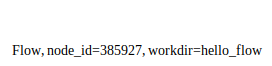

In [161]:
hello_flow.get_graphviz()

Our flow is empty, let's start to populate it

#### Now we add a new *Task* by just passing an *AbinitInput* for SCF calculations:

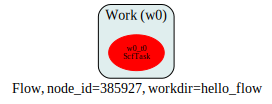

In [162]:
scf_input, nscf_input = make_scf_nscf_inputs()

hello_flow.register_scf_task(scf_input, append=True)
hello_flow.get_graphviz()

#### To select the first work:

In [163]:
hello_flow[0]

<Work, node_id=385928, workdir=hello_flow/w0>

#### To select the first *Task* in the first *Work*:

In [164]:
hello_flow[0][0]

<ScfTask, node_id=385929, workdir=hello_flow/w0/t0>

#### Now the tricky part

We want to register a NSCF calculation that should depend on the *scf_task* in *w0_t0* via the DEN file. 

<!--
We can use the same API but we must specify the dependency between the two steps with the {scf_task: "DEN"} dictionary:
-->

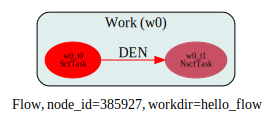

In [165]:
hello_flow.register_nscf_task(nscf_input, deps={hello_flow[0][0]: "DEN"}, 
                              append=True)

hello_flow.get_graphviz(engine="dot")

#### A *Work* is a list of *Tasks* and we can iterate with the syntax:

In [166]:
for task in hello_flow[0]:
    print(task)

<ScfTask, node_id=385929, workdir=hello_flow/w0/t0>
<NscfTask, node_id=385930, workdir=hello_flow/w0/t1>



Now let's assume we want to add a second Nscf calculation (NscTask) in which we change one of the input parameters e.g. the number of bands and that, for some reason, we really want to re-use the output WFK file produced by w0_t1 to initialize the eigenvalue solver (obviously we still need a DEN file). How can we express this with AbiPy?

<!--
Excellent, we managed to build our first AbiPy flow with inter-dependent tasks in just six lines of code (including the three calls to graphviz). 

Well, the syntax for the new deps, it's just:

deps = {hello_flow[0][0]: "DEN", hello_flow[0][1]: "WFK"}
but we should also change the input variable nband in the nscf_input before creating the new NscTask (remember that building a Task requires an AbinitInput object and a list of dependencies, if any).

Now there are two ways to increase nband: the wrong way and the correct one! Let's start from the wrong way because it's always useful to learn from our mistakes. Let's print some values just for the record:
-->

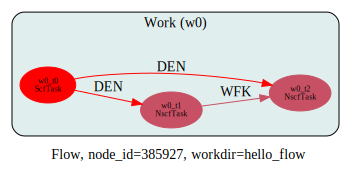

In [167]:
t1 = hello_flow[0][1]

# Copy the input of t1 and change nband
new_input = t1.input.new_with_vars(nband=1000)  

deps = {hello_flow[0][0]: "DEN", hello_flow[0][1]: "WFK"}

hello_flow.register_nscf_task(new_input, deps=deps, append=True)

hello_flow.get_graphviz(engine="dot")

#### Tasks can be connected to external files:

nband in tasks: [8, 10, 20]


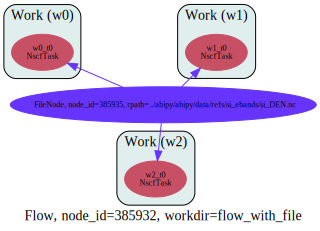

In [168]:
flow_with_file = flowtk.Flow(workdir="flow_with_file")

den_filepath = abidata.ref_file("si_DEN.nc")
flow_with_file.register_nscf_task(nscf_input, deps={den_filepath: "DEN"})

for nband in [10, 20]:
    flow_with_file.register_nscf_task(nscf_input.new_with_vars(nband=nband), 
                                      deps={den_filepath: "DEN"}, append=False)

print("nband in tasks:", [task.input["nband"] for task in flow_with_file.iflat_tasks()])
flow_with_file.get_graphviz()

In [169]:
def make_scf_input(ecut=2, ngkpt=(4, 4, 4)):
    """
    This function constructs an `AbinitInput` to perform a GS-SCF calculation 
    in crystalline AlAs.

    Args:
        ecut: cutoff energy in Ha.
        ngkpt: 3 integers specifying the k-mesh for the electrons.

    Return:
        `AbinitInput` object
    """
    # Initialize the AlAs structure from an internal database. Use the pseudos shipped with AbiPy.
    gs_inp = abilab.AbinitInput(structure=abidata.structure_from_ucell("AlAs"),
                                pseudos=abidata.pseudos("13al.981214.fhi", "33as.pspnc"))

    # Set the value of the Abinit variables needed for GS runs.
    gs_inp.set_vars(
        nband=4,
        ecut=ecut,
        ngkpt=ngkpt,
        nshiftk=4,
        shiftk=[0.0, 0.0, 0.5,   # This gives the usual fcc Monkhorst-Pack grid
                0.0, 0.5, 0.0,
                0.5, 0.0, 0.0,
                0.5, 0.5, 0.5],
        tolvrs=1.0e-10,
    )

    return gs_inp

## Phonon band structure of AlAs

Now we are finally ready for the calculation of the vibrational spectrum of AlAs. 

<!--
We already managed to run DFPT calculations at Γ with different values of ecut and the steps required to get a full band structure are not that different, provided that the following differences are taken into account:

we need the dynamical matrix D(q) on a homogeneous mesh so that it is possible to calculate D(R) in anaddb via Fourier transform and then phonon frequencies for arbitrary q-points via Fourier interpolation


AlAs is a polar semiconductor so we need to include the LO-TO splitting for q→0 that, in turns, requires the DFPT computation of the Born effective charges and of the dielectric constant.

In AbiPy, these concepts are translated in an easy-to-use API in which you pass an initial AbinitInput object, you specify the q-mesh for phonons in terms of ph_nqpt and activate the computation of the Born effective charges with the boolean flag with_becs.

Let's have a look at the code (as usual there are more comments than lines of code)
-->

In [170]:
def build_flow_alas_phonons():
    """
    Build and return a Flow to compute the dynamical matrix on a (2, 2, 2) qmesh
    as well as DDK and Born effective charges.
    The final DDB with all perturbations will be merged automatically and placed
    in the Flow `outdir` directory.
    """
    from abipy import flowtk
    scf_input = make_scf_input(ecut=6, ngkpt=(4, 4, 4))
    return flowtk.PhononFlow.from_scf_input("flow_alas_phonons", scf_input,
                                            ph_ngqpt=(2, 2, 2), with_becs=True)

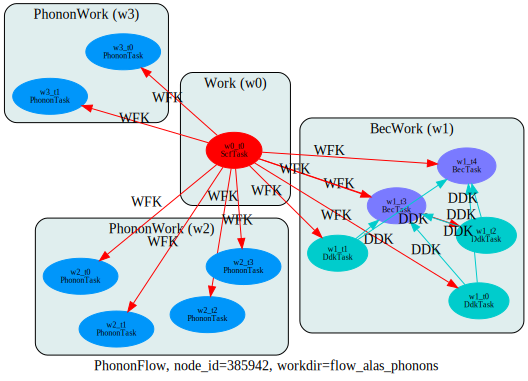

In [171]:
flow_phbands = build_flow_alas_phonons()
flow_phbands.get_graphviz()

Executing

flow.make_scheduler().start()
inside a jupyter notebook is handy if you are dealing with small calculations that require few seconds or minutes. This approach, however, is unpractical when you have large flows or big calculations requiring hours or days, even on massively parallel machines. In this case, indeed, one would like to run the scheduler in a separate process in the backgroud so that the scheduler is not killed when the jupyter server is closed.

To start the scheduler in a separate process, use the abirun.py script. The syntax is:

abirun.py flow_workdir COMMAND

where flow_workdir is the directory containing the Flow (the directory with the pickle file) and command selects the operation to be performed.

Typical examples:

abirun.py /tmp/hello_bands status

checks the status of the Flow and print the results to screen while

nohup abirun.py /tmp/hello_bands scheduler > sched.log 2> sched.err &

starts the scheduler in the background redirecting the standard output to file sched.log

`nohup` is a standard Unix tool. The command make the scheduler immune to hangups so that you can close the shell session without killing the scheduler.
This brings us to the last and most crucial question. How do we configure AbiPy to run Abinit workflows on different architectures ranging from standard laptops to high-performance supercomputers?

Unfortunately this notebook is already quite long and these details are best covered in a technical documentation. What should be stressed here is that the behaviour can be customized with two Yaml files. All the information related to your environment (Abinit build, modules, resource managers, shell environment) are read from the manager.yml configuration file, that is usually located in the directory ~/.abinit/abipy/ The options for the python scheduler responsible for job submission are given in scheduler.yml.

For a more complete description of these configuration options, please consult the TaskManager documentation. A list of configuration files for different machines and clusters is available here while the Flows HOWTO gathers answers to frequently asked questions.

Last but not least, check out our gallery of AbiPy Flows for inspiration.

## DFPT calculations with Abiflows and Fireworks

<img src="./assets/abiflows_deps.png" width="75%" align="center">

```python
from pseudo_dojo.core.pseudos import OfficialDojoTable
from abiflows.fireworks.workflows.abinit_workflows import PhononFullFwWorkflow 

# Pseudopotential Table from PseudoDojo
pseudo_table = OfficialDojoTable.from_dojodir('ONCVPSP-PBEsol-PDv0.4','standard')

wf = PhononFullFWWorkflow.from_factory(structure=structure, pseudos=pseudo_table)
```

<img src="./assets/abiflows_workflow.png" width="95%" align="center">

<img src="./assets/fw_model.png" width="25%" align="center">

```python
from abiflows.fireworks.workflows.abinit_workflows import *
from abiflows.database.mongoengine.utils import DatabaseData
from abiflows.database.mongoengine.abinit_results import RelaxResult
from pseudo_dojo.core.pseudos import OfficialDojoTable

# Pseudopotential Table from PseudoDojo
pseudo_table = OfficialDojoTable.from_dojodir('ONCVPSP-PBEsol-PDv0.4','standard')

# Data from the database where the relaxed structures are stored
source_db = DatabaseData(host='database_address', port=27017, 
                         collection='collection_name_used_for_relax', 
                         database='database_used_to_store_relax_calc', 
                         username='username', password='password')

# data for the database where the phonon results will be stored
db = DatabaseData(host='database_address', port=27017, collection='phonon_bs', 
                  database='database_name_eg_phonons', username='username', 
                  password='password')

# Connect to the database
source_db.connect_mongoengine()

with source_db.switch_collection(RelaxResult) as RelaxResult:
    # Download relaxed structure from the database.
    relaxed_structure = RelaxResult.objects(mp_id="mp-149")[0].structure


wf = PhononFullFWWorkflow.from_factory(structure=structure, pseudos=pseudo_table)

wf.add_mongoengine_db_insertion(db)

wf.add_final_cleanup(["WFK", "1WF", "WFQ", "1POT", "1DEN"])

wf.add_to_db()
```

<img src="./assets/petretto_results.png" width="95%" align="center">

## GW calculations with AbiPy

<img src="./assets/hedin_equations.png" width="75%" height="30%" align="center">

* Many-body approach to compute band gaps and **charged** excitation energies associated to $|N, {\text{GS}} \rangle \rightarrow |N \pm 1, j\rangle$ transitions with clamped ions

* Hedin's equations are usually solved within the so-called **one-shot** $G_0W_0$ approximation (one iteration of the equations in the right panel) 

* **More accurate** than Kohn-Sham theory but also **more expensive** and more difficult to converge 

<img src="./assets/gw_flowchart.png" width="95%" heigh="40%" align="center">

### Interpolating $GW$ corrections with AbiPy

We can only compute QP energies for k-points belonging to the k-mesh of the input WFK file while we usually discuss electronic properties in terms of band energies along a high-symmetry k-path. 

<!-- Obviously one could perform several different GW calculations with "shifted" WFK files to collect the QP energies along the k-path but this is not the most efficient approach. Can't we just use some kind of interpolation technique to get nice-looking QP band structures?

The answer is yes but remember to always cross-check the interpolated results. Several different approaches to interpolate QP results have been proposed in the literature. 
-->

Here we use the Fourier interpolation scheme proposed by Shankland-Koelling-Wood (SKW) in PRB 38 2721. The idea is relatively simple: the QP corrections have the same symmetry of the KS energies, we can thus interpolate the QP corrections with SKW and then apply the interpolated corrections to the ab-initio KS energies obtained along a path.

sigres = abilab.abiopen("flow_g0w0/w1/t2/outdata/out_SIGRES.nc")

It's just a matter of passing the KS band structure to the sigres.interpolate method to activate this procedure:

r = sigres.interpolate(lpratio=5, ks_ebands_kpath=ks_ebands_kpath)


The interpolated QP band structure is available in r.qp_ebands_kpath and we can plot the interpolated data with:

r.qp_ebands_kpath.plot();

The results make sense but it would be nice if one could compare the (interpolated) QP bands with the KS energies. Fortunately, we can use the AbiPy ElectronBandsPlotter to compare multiple band structures:

p = abilab.ElectronBandsPlotter()
p.add_ebands("LDA", ks_ebands_kpath)
p.add_ebands("GW (interpolated)", r.qp_ebands_kpath)
p.combiplot();

Do you need to compare the band dispersion given by KS and GW?

# By default, the two band energies are shifted with respect to *their* fermi level.
# Use e=0 if you do not want to shift the eigenvalues
# so that it is possible to visualize the QP corrections.
p.combiboxplot();

The same approach can be used to interpolate QP band structures and QP DOSes. We only need to pass an additional KS band structure with energies in the IBZ:

r2 = sigres.interpolate(lpratio=5, ks_ebands_kpath=ks_ebands_kpath, ks_ebands_kmesh=ks_ebands_kmesh)
Using: 30 star-functions. nstars/nk: 5.0
FIT vs input data: Mean Absolute Error= 2.839e-13 (meV)
and then compute the QP DOS with:

qp_edos = r2.qp_ebands_kmesh.get_edos()
Did I tell you that ElectronBandsPlotter accepts DOSes as well?

p2 = abilab.ElectronBandsPlotter()
p2.add_ebands("LDA", ks_ebands_kpath, edos=ks_edos)
p2.add_ebands("GW (interpolated)", r.qp_ebands_kpath, edos=qp_edos)
p2.combiplot();

## Conclusions

* The *ab-initio* community is migrating to *python* to implement:

    * Post-processing tools
    * Web-based technologies to analyze data (*e.g.* *jupyter* notebooks) 
    * High-level logic for scientific workflows and *high-throughput* applications
    
* Difficulties for users:

    * Big software stack (C/C++/Fortran/Python/Javascript ...)
    * Multiple technologies under the hood (databases, *JSON*, *HDF5*, *MPI/OMP* ...) 
    * Users are assumed to be familiar with programming techniques

* Advantages for users:
    
    * Traditional GUIs are still useful but researchers sometimes requires programmatic 
      interfaces to analyze raw data
    * Several python packages to boost productivity and do better science


> "An investment in knowledge pays the best interest" (Benjamin Franklin)